In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [3]:
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [4]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
        if col in test_df.columns:
            test_df[col] = test_df[col].fillna(train_df[col].mode()[0])
    else:
        train_df[col] = train_df[col].fillna(train_df[col].median())
        if col in test_df.columns:
            test_df[col] = test_df[col].fillna(train_df[col].median())

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_df[cat_cols] = encoder.fit_transform(train_df[cat_cols])
test_df[cat_cols] = encoder.transform(test_df[cat_cols])

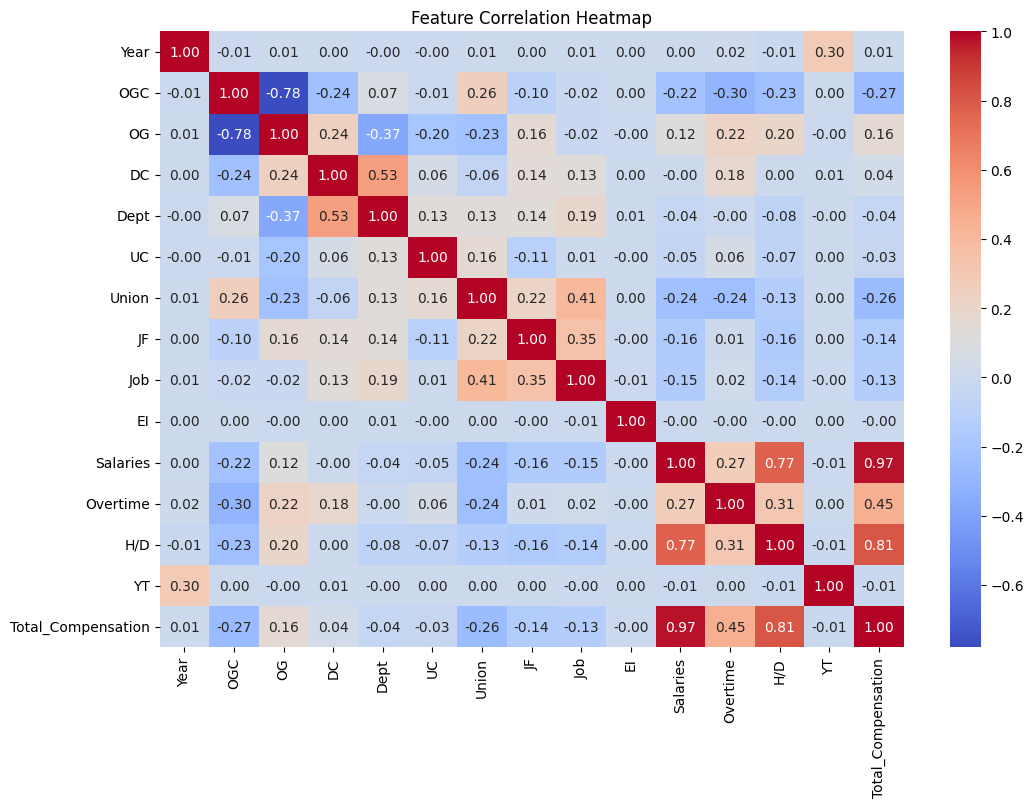

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('Feature Correlation Heatmap')
plt.show()

In [8]:
target_col = 'Total_Compensation'
X = train_df.drop(columns=[target_col])
y = train_df[target_col]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
num_cols = test_df.select_dtypes(include=[np.number]).columns.tolist()

In [11]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9987884240325359

In [16]:
from sklearn.metrics import r2_score

In [17]:
y_pred = model.predict(X_val)
print("R2 Score:", r2_score(y_val, y_pred))

R2 Score: 0.9916921075643266


In [18]:
test_df_copy = test_df.copy()
test_df_copy[target_col] = model.predict(test_df)

In [19]:
test_df_copy.to_csv('compensation_predictions.csv', index=False)
print("Saved compensation_predictions.csv with all columns and prediction.")

Saved compensation_predictions.csv with all columns and prediction.
